# Child Seat Localization

Author: Fernando Kelvin da Silva Soares

Notebook Versio: V0.0




## Introduction
In this notebook we will explore the child seat localization problem. The goal here, is to say in wich seat a child/infant seat is locates in the back part of a veicle. It was used as reference the SVIRO sunthetic dataset and some papers [1][2] wrote by the svriro team, available in [the SVIRO website](https://sviro.kl.dfki.de/), as weel as, other cientific papers and websites to implement a image classifier for each back seat position. 

Dififferently from the implementations presented by the SVIRO team on their papers, wich are focused on train the networks in one vehicle and see how they perform in unknown vhicles. In this work was decided to use more then one veichle for trainin and check the accuracy in unknown vehicles, to explore if there is a significant reseult compared to the single vehicle training.

The porpouse of this project is to give a flexible and fast framework to explore the child seat problem understanding the limitations and possibilities involved.


##### Copyright The SVIRO Authors

The usage of the SVIRO dataset is subjectet to the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License. All all the credits must be given to the authors as follow.


[1] Steve Dias Da Cruz, Oliver Wasenmüller, Hans-Peter Beise, Thomas Stifter, & Didier Stricker (2020). SVIRO: Synthetic Vehicle Interior Rear Seat Occupancy Dataset and Benchmark. In IEEE Winter Conference on Applications of Computer Vision (WACV).

[2] Steve Dias Da Cruz, Bertram Taetz, Oliver Wasenmüller, Thomas Stifter, & Didier Stricker (2021). Autoencoder Based Inter-Vehicle Generalization for In-Cabin Occupant Classification. In IEEE Intelligent Vehicles Symposium (IV).




In [1]:
#@title Attribution-NonCommercial-ShareAlike 4.0 International

# =======================================================================

# Creative Commons Corporation ("Creative Commons") is not a law firm and
# does not provide legal services or legal advice. Distribution of
# Creative Commons public licenses does not create a lawyer-client or
# other relationship. Creative Commons makes its licenses and related
# information available on an "as-is" basis. Creative Commons gives no
# warranties regarding its licenses, any material licensed under their
# terms and conditions, or any related information. Creative Commons
# disclaims all liability for damages resulting from their use to the
# fullest extent possible.

# Using Creative Commons Public Licenses

# Creative Commons public licenses provide a standard set of terms and
# conditions that creators and other rights holders may use to share
# original works of authorship and other material subject to copyright
# and certain other rights specified in the public license below. The
# following considerations are for informational purposes only, are not
# exhaustive, and do not form part of our licenses.

#      Considerations for licensors: Our public licenses are
#      intended for use by those authorized to give the public
#      permission to use material in ways otherwise restricted by
#      copyright and certain other rights. Our licenses are
#      irrevocable. Licensors should read and understand the terms
#      and conditions of the license they choose before applying it.
#      Licensors should also secure all rights necessary before
#      applying our licenses so that the public can reuse the
#      material as expected. Licensors should clearly mark any
#      material not subject to the license. This includes other CC-
#      licensed material, or material used under an exception or
#      limitation to copyright. More considerations for licensors:
# 	wiki.creativecommons.org/Considerations_for_licensors

#      Considerations for the public: By using one of our public
#      licenses, a licensor grants the public permission to use the
#      licensed material under specified terms and conditions. If
#      the licensor's permission is not necessary for any reason--for
#      example, because of any applicable exception or limitation to
#      copyright--then that use is not regulated by the license. Our
#      licenses grant only permissions under copyright and certain
#      other rights that a licensor has authority to grant. Use of
#      the licensed material may still be restricted for other
#      reasons, including because others have copyright or other
#      rights in the material. A licensor may make special requests,
#      such as asking that all changes be marked or described.
#      Although not required by our licenses, you are encouraged to
#      respect those requests where reasonable. More_considerations
#      for the public: 
# 	wiki.creativecommons.org/Considerations_for_licensees

# =======================================================================

# Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International
# Public License

# By exercising the Licensed Rights (defined below), You accept and agree
# to be bound by the terms and conditions of this Creative Commons
# Attribution-NonCommercial-ShareAlike 4.0 International Public License
# ("Public License"). To the extent this Public License may be
# interpreted as a contract, You are granted the Licensed Rights in
# consideration of Your acceptance of these terms and conditions, and the
# Licensor grants You such rights in consideration of benefits the
# Licensor receives from making the Licensed Material available under
# these terms and conditions.


# Section 1 -- Definitions.

#   a. Adapted Material means material subject to Copyright and Similar
#      Rights that is derived from or based upon the Licensed Material
#      and in which the Licensed Material is translated, altered,
#      arranged, transformed, or otherwise modified in a manner requiring
#      permission under the Copyright and Similar Rights held by the
#      Licensor. For purposes of this Public License, where the Licensed
#      Material is a musical work, performance, or sound recording,
#      Adapted Material is always produced where the Licensed Material is
#      synched in timed relation with a moving image.

#   b. Adapter's License means the license You apply to Your Copyright
#      and Similar Rights in Your contributions to Adapted Material in
#      accordance with the terms and conditions of this Public License.

#   c. BY-NC-SA Compatible License means a license listed at
#      creativecommons.org/compatiblelicenses, approved by Creative
#      Commons as essentially the equivalent of this Public License.

#   d. Copyright and Similar Rights means copyright and/or similar rights
#      closely related to copyright including, without limitation,
#      performance, broadcast, sound recording, and Sui Generis Database
#      Rights, without regard to how the rights are labeled or
#      categorized. For purposes of this Public License, the rights
#      specified in Section 2(b)(1)-(2) are not Copyright and Similar
#      Rights.

#   e. Effective Technological Measures means those measures that, in the
#      absence of proper authority, may not be circumvented under laws
#      fulfilling obligations under Article 11 of the WIPO Copyright
#      Treaty adopted on December 20, 1996, and/or similar international
#      agreements.

#   f. Exceptions and Limitations means fair use, fair dealing, and/or
#      any other exception or limitation to Copyright and Similar Rights
#      that applies to Your use of the Licensed Material.

#   g. License Elements means the license attributes listed in the name
#      of a Creative Commons Public License. The License Elements of this
#      Public License are Attribution, NonCommercial, and ShareAlike.

#   h. Licensed Material means the artistic or literary work, database,
#      or other material to which the Licensor applied this Public
#      License.

#   i. Licensed Rights means the rights granted to You subject to the
#      terms and conditions of this Public License, which are limited to
#      all Copyright and Similar Rights that apply to Your use of the
#      Licensed Material and that the Licensor has authority to license.

#   j. Licensor means the individual(s) or entity(ies) granting rights
#      under this Public License.

#   k. NonCommercial means not primarily intended for or directed towards
#      commercial advantage or monetary compensation. For purposes of
#      this Public License, the exchange of the Licensed Material for
#      other material subject to Copyright and Similar Rights by digital
#      file-sharing or similar means is NonCommercial provided there is
#      no payment of monetary compensation in connection with the
#      exchange.

#   l. Share means to provide material to the public by any means or
#      process that requires permission under the Licensed Rights, such
#      as reproduction, public display, public performance, distribution,
#      dissemination, communication, or importation, and to make material
#      available to the public including in ways that members of the
#      public may access the material from a place and at a time
#      individually chosen by them.

#   m. Sui Generis Database Rights means rights other than copyright
#      resulting from Directive 96/9/EC of the European Parliament and of
#      the Council of 11 March 1996 on the legal protection of databases,
#      as amended and/or succeeded, as well as other essentially
#      equivalent rights anywhere in the world.

#   n. You means the individual or entity exercising the Licensed Rights
#      under this Public License. Your has a corresponding meaning.


# Section 2 -- Scope.

#   a. License grant.

#        1. Subject to the terms and conditions of this Public License,
#           the Licensor hereby grants You a worldwide, royalty-free,
#           non-sublicensable, non-exclusive, irrevocable license to
#           exercise the Licensed Rights in the Licensed Material to:

#             a. reproduce and Share the Licensed Material, in whole or
#                in part, for NonCommercial purposes only; and

#             b. produce, reproduce, and Share Adapted Material for
#                NonCommercial purposes only.

#        2. Exceptions and Limitations. For the avoidance of doubt, where
#           Exceptions and Limitations apply to Your use, this Public
#           License does not apply, and You do not need to comply with
#           its terms and conditions.

#        3. Term. The term of this Public License is specified in Section
#           6(a).

#        4. Media and formats; technical modifications allowed. The
#           Licensor authorizes You to exercise the Licensed Rights in
#           all media and formats whether now known or hereafter created,
#           and to make technical modifications necessary to do so. The
#           Licensor waives and/or agrees not to assert any right or
#           authority to forbid You from making technical modifications
#           necessary to exercise the Licensed Rights, including
#           technical modifications necessary to circumvent Effective
#           Technological Measures. For purposes of this Public License,
#           simply making modifications authorized by this Section 2(a)
#           (4) never produces Adapted Material.

#        5. Downstream recipients.

#             a. Offer from the Licensor -- Licensed Material. Every
#                recipient of the Licensed Material automatically
#                receives an offer from the Licensor to exercise the
#                Licensed Rights under the terms and conditions of this
#                Public License.

#             b. Additional offer from the Licensor -- Adapted Material.
#                Every recipient of Adapted Material from You
#                automatically receives an offer from the Licensor to
#                exercise the Licensed Rights in the Adapted Material
#                under the conditions of the Adapter's License You apply.

#             c. No downstream restrictions. You may not offer or impose
#                any additional or different terms or conditions on, or
#                apply any Effective Technological Measures to, the
#                Licensed Material if doing so restricts exercise of the
#                Licensed Rights by any recipient of the Licensed
#                Material.

#        6. No endorsement. Nothing in this Public License constitutes or
#           may be construed as permission to assert or imply that You
#           are, or that Your use of the Licensed Material is, connected
#           with, or sponsored, endorsed, or granted official status by,
#           the Licensor or others designated to receive attribution as
#           provided in Section 3(a)(1)(A)(i).

#   b. Other rights.

#        1. Moral rights, such as the right of integrity, are not
#           licensed under this Public License, nor are publicity,
#           privacy, and/or other similar personality rights; however, to
#           the extent possible, the Licensor waives and/or agrees not to
#           assert any such rights held by the Licensor to the limited
#           extent necessary to allow You to exercise the Licensed
#           Rights, but not otherwise.

#        2. Patent and trademark rights are not licensed under this
#           Public License.

#        3. To the extent possible, the Licensor waives any right to
#           collect royalties from You for the exercise of the Licensed
#           Rights, whether directly or through a collecting society
#           under any voluntary or waivable statutory or compulsory
#           licensing scheme. In all other cases the Licensor expressly
#           reserves any right to collect such royalties, including when
#           the Licensed Material is used other than for NonCommercial
#           purposes.


# Section 3 -- License Conditions.

# Your exercise of the Licensed Rights is expressly made subject to the
# following conditions.

#   a. Attribution.

#        1. If You Share the Licensed Material (including in modified
#           form), You must:

#             a. retain the following if it is supplied by the Licensor
#                with the Licensed Material:

#                  i. identification of the creator(s) of the Licensed
#                     Material and any others designated to receive
#                     attribution, in any reasonable manner requested by
#                     the Licensor (including by pseudonym if
#                     designated);

#                 ii. a copyright notice;

#                iii. a notice that refers to this Public License;

#                 iv. a notice that refers to the disclaimer of
#                     warranties;

#                  v. a URI or hyperlink to the Licensed Material to the
#                     extent reasonably practicable;

#             b. indicate if You modified the Licensed Material and
#                retain an indication of any previous modifications; and

#             c. indicate the Licensed Material is licensed under this
#                Public License, and include the text of, or the URI or
#                hyperlink to, this Public License.

#        2. You may satisfy the conditions in Section 3(a)(1) in any
#           reasonable manner based on the medium, means, and context in
#           which You Share the Licensed Material. For example, it may be
#           reasonable to satisfy the conditions by providing a URI or
#           hyperlink to a resource that includes the required
#           information.
#        3. If requested by the Licensor, You must remove any of the
#           information required by Section 3(a)(1)(A) to the extent
#           reasonably practicable.

#   b. ShareAlike.

#      In addition to the conditions in Section 3(a), if You Share
#      Adapted Material You produce, the following conditions also apply.

#        1. The Adapter's License You apply must be a Creative Commons
#           license with the same License Elements, this version or
#           later, or a BY-NC-SA Compatible License.

#        2. You must include the text of, or the URI or hyperlink to, the
#           Adapter's License You apply. You may satisfy this condition
#           in any reasonable manner based on the medium, means, and
#           context in which You Share Adapted Material.

#        3. You may not offer or impose any additional or different terms
#           or conditions on, or apply any Effective Technological
#           Measures to, Adapted Material that restrict exercise of the
#           rights granted under the Adapter's License You apply.


# Section 4 -- Sui Generis Database Rights.

# Where the Licensed Rights include Sui Generis Database Rights that
# apply to Your use of the Licensed Material:

#   a. for the avoidance of doubt, Section 2(a)(1) grants You the right
#      to extract, reuse, reproduce, and Share all or a substantial
#      portion of the contents of the database for NonCommercial purposes
#      only;

#   b. if You include all or a substantial portion of the database
#      contents in a database in which You have Sui Generis Database
#      Rights, then the database in which You have Sui Generis Database
#      Rights (but not its individual contents) is Adapted Material,
#      including for purposes of Section 3(b); and

#   c. You must comply with the conditions in Section 3(a) if You Share
#      all or a substantial portion of the contents of the database.

# For the avoidance of doubt, this Section 4 supplements and does not
# replace Your obligations under this Public License where the Licensed
# Rights include other Copyright and Similar Rights.


# Section 5 -- Disclaimer of Warranties and Limitation of Liability.

#   a. UNLESS OTHERWISE SEPARATELY UNDERTAKEN BY THE LICENSOR, TO THE
#      EXTENT POSSIBLE, THE LICENSOR OFFERS THE LICENSED MATERIAL AS-IS
#      AND AS-AVAILABLE, AND MAKES NO REPRESENTATIONS OR WARRANTIES OF
#      ANY KIND CONCERNING THE LICENSED MATERIAL, WHETHER EXPRESS,
#      IMPLIED, STATUTORY, OR OTHER. THIS INCLUDES, WITHOUT LIMITATION,
#      WARRANTIES OF TITLE, MERCHANTABILITY, FITNESS FOR A PARTICULAR
#      PURPOSE, NON-INFRINGEMENT, ABSENCE OF LATENT OR OTHER DEFECTS,
#      ACCURACY, OR THE PRESENCE OR ABSENCE OF ERRORS, WHETHER OR NOT
#      KNOWN OR DISCOVERABLE. WHERE DISCLAIMERS OF WARRANTIES ARE NOT
#      ALLOWED IN FULL OR IN PART, THIS DISCLAIMER MAY NOT APPLY TO YOU.

#   b. TO THE EXTENT POSSIBLE, IN NO EVENT WILL THE LICENSOR BE LIABLE
#      TO YOU ON ANY LEGAL THEORY (INCLUDING, WITHOUT LIMITATION,
#      NEGLIGENCE) OR OTHERWISE FOR ANY DIRECT, SPECIAL, INDIRECT,
#      INCIDENTAL, CONSEQUENTIAL, PUNITIVE, EXEMPLARY, OR OTHER LOSSES,
#      COSTS, EXPENSES, OR DAMAGES ARISING OUT OF THIS PUBLIC LICENSE OR
#      USE OF THE LICENSED MATERIAL, EVEN IF THE LICENSOR HAS BEEN
#      ADVISED OF THE POSSIBILITY OF SUCH LOSSES, COSTS, EXPENSES, OR
#      DAMAGES. WHERE A LIMITATION OF LIABILITY IS NOT ALLOWED IN FULL OR
#      IN PART, THIS LIMITATION MAY NOT APPLY TO YOU.

#   c. The disclaimer of warranties and limitation of liability provided
#      above shall be interpreted in a manner that, to the extent
#      possible, most closely approximates an absolute disclaimer and
#      waiver of all liability.


# Section 6 -- Term and Termination.

#   a. This Public License applies for the term of the Copyright and
#      Similar Rights licensed here. However, if You fail to comply with
#      this Public License, then Your rights under this Public License
#      terminate automatically.

#   b. Where Your right to use the Licensed Material has terminated under
#      Section 6(a), it reinstates:

#        1. automatically as of the date the violation is cured, provided
#           it is cured within 30 days of Your discovery of the
#           violation; or

#        2. upon express reinstatement by the Licensor.

#      For the avoidance of doubt, this Section 6(b) does not affect any
#      right the Licensor may have to seek remedies for Your violations
#      of this Public License.

#   c. For the avoidance of doubt, the Licensor may also offer the
#      Licensed Material under separate terms or conditions or stop
#      distributing the Licensed Material at any time; however, doing so
#      will not terminate this Public License.

#   d. Sections 1, 5, 6, 7, and 8 survive termination of this Public
#      License.


# Section 7 -- Other Terms and Conditions.

#   a. The Licensor shall not be bound by any additional or different
#      terms or conditions communicated by You unless expressly agreed.

#   b. Any arrangements, understandings, or agreements regarding the
#      Licensed Material not stated herein are separate from and
#      independent of the terms and conditions of this Public License.


# Section 8 -- Interpretation.

#   a. For the avoidance of doubt, this Public License does not, and
#      shall not be interpreted to, reduce, limit, restrict, or impose
#      conditions on any use of the Licensed Material that could lawfully
#      be made without permission under this Public License.

#   b. To the extent possible, if any provision of this Public License is
#      deemed unenforceable, it shall be automatically reformed to the
#      minimum extent necessary to make it enforceable. If the provision
#      cannot be reformed, it shall be severed from this Public License
#      without affecting the enforceability of the remaining terms and
#      conditions.

#   c. No term or condition of this Public License will be waived and no
#      failure to comply consented to unless expressly agreed to by the
#      Licensor.

#   d. Nothing in this Public License constitutes or may be interpreted
#      as a limitation upon, or waiver of, any privileges and immunities
#      that apply to the Licensor or You, including from the legal
#      processes of any jurisdiction or authority.

# =======================================================================

# Creative Commons is not a party to its public
# licenses. Notwithstanding, Creative Commons may elect to apply one of
# its public licenses to material it publishes and in those instances
# will be considered the “Licensor.” The text of the Creative Commons
# public licenses is dedicated to the public domain under the CC0 Public
# Domain Dedication. Except for the limited purpose of indicating that
# material is shared under a Creative Commons public license or as
# otherwise permitted by the Creative Commons policies published at
# creativecommons.org/policies, Creative Commons does not authorize the
# use of the trademark "Creative Commons" or any other trademark or logo
# of Creative Commons without its prior written consent including,
# without limitation, in connection with any unauthorized modifications
# to any of its public licenses or any other arrangements,
# understandings, or agreements concerning use of licensed material. For
# the avoidance of doubt, this paragraph does not form part of the
# public licenses.

# Creative Commons may be contacted at creativecommons.org.

##### Copyright 2019 The TensorFlow Authors.

Many function on this notebook ware based on the tutorial https://www.tensorflow.org/tutorials/images/transfer_learning, and all the rights are reseverved to the authors. Please do not share this notebook witout given proper credits.

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [3]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet                                                                                                                    # IGNORE_COPYRIGHT: cleared by OSS licensing
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.


# Imports



In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pathlib
import seaborn as sns
from os import listdir
import os.path as path
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
from tensorflow.keras.layers.experimental.preprocessing import RandomZoom
from tensorflow.keras.layers.experimental.preprocessing import RandomContrast

#Check the tensorflow version, the recomended for this notebook is the 2.5.0.
print(tf.__version__)

2.5.0


If you are using Google Colab, is recomended to use the GPU for fast training. To acctivate the GPU, go to *"Runtime->Change runtime type"* and select GPU at in the *"Hardware Accelerator"* dropdown menu.

You can check the alocated GPU model runnning the following command.

In [5]:
!nvidia-smi

Wed Jun 16 03:00:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Conecto to your Drive repository

If you want to use you Google Drive repository to load the train dataset, run the following session, log-in into your accont, copy the verification code and paste in the output entry.

In [6]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Global Definitions 

Here we have some constants that are used in all the sections of the notebook.

Set up the MAIN PATH to you repository main folder containing, the models and datasets.

The IMAGE_SHAPE will depend on the network you are using. In this case we will train a [EfficientNet stadard implementation](https://arxiv.org/pdf/1905.11946v5.pdf) network that accepts different input sizes, so can use the single seat image size of 250x550.

In this notebook we can explore not only the SVIRO classes but also a summarized version of the existent clsses, where all the child/infant seat with or without child are cosidered as the same class.

In [7]:
MAIN_PATH  = '/content/gdrive/MyDrive/Colab_Notebooks/Child_Seat_Localization/classifier'

IMAGE_HIGHT = 258
IMAGE_WIDTH = 258
IMAGE_SHAPE = (IMAGE_HIGHT, IMAGE_WIDTH, 3) #The image shape may vary according to you network model

# SVIRO Classes
CLASSES = {0: "Empty seat",
           1: "Infant in infant seat",
           2: "Child on child seat",
           3: "Adult passenger",
           4: "Everyday object",
           5: "Infant seat without baby",
           6: "Child seat without child"}


# Preparing the Dataset

As we are implementing a sigle seat image cassifier the training dataset was created using the single seat grayscale images fom the SVIRO dataset.

In the original dataset we have 10 different vehicles, that we can arrange in 3 classes: Small Vhicle (two door), Regular Vehicle and Big vehicle (SUV and Truck). So, to create the train/validation dataset one vehicle from each one of this classes was chosen, considereng a good variability of interior styles. 
Are they: Renault **Zoe**, Toyota **Hilux** and Tesla **Model3**.

From the original train folder of each one, 1800 images ware taken for each of the seven classes, totalizing 3150 images on the final train/validation dataset.

It was used a 80:20 split for training and validation data.




In [8]:
train_dataset_path = '{}/datasets/train/sviro_classes'.format(MAIN_PATH)

# From the paper of efficient det they use a 258x258 resolution for the b7 model
BATCH_SIZE = 64
VALIDATION_SPLIT = 0.2

# crate a train and validation dataset with a 80:20 split
train_dataset = image_dataset_from_directory(train_dataset_path,
                                            validation_split=VALIDATION_SPLIT,
                                            subset="training",
                                            seed=123,
                                            image_size=(IMAGE_HIGHT, IMAGE_WIDTH),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            smart_resize=False)

valid_dataset = image_dataset_from_directory(train_dataset_path,
                                            validation_split=VALIDATION_SPLIT,
                                            subset="validation",
                                            seed=123,
                                            image_size=(IMAGE_HIGHT, IMAGE_WIDTH),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            smart_resize=False)

Found 3150 files belonging to 7 classes.
Using 2520 files for training.
Found 3150 files belonging to 7 classes.
Using 630 files for validation.


Looking at some examples from the train dataset.

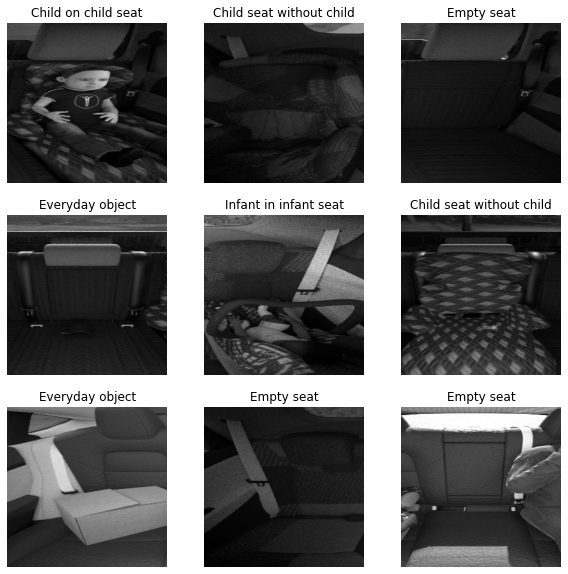

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(CLASSES[int(labels[i])])
        plt.axis("off")

Here we use AUTOTUNE prefetch to optimise the traing performance.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE 

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = valid_dataset.prefetch(buffer_size=AUTOTUNE)

# Training the Model

### Create the model based on a pre-treined model

For a faster implemantation and training, it was chosen to use the pre-trained models, on the imagenet dataset, from  [Keras Aplication](https://www.tensorflow.org/api_docs/python/tf/keras/applications) module. 

As said before, for this implemantation the EfficientNet B7 was chosen, due it's good performance on the imagenet dataset and faster inference time compared to the best existent neural networks, as we can see in the [paperswithcode.com Image Classification on ImageNet benchmark](https:https://paperswithcode.com/sota/image-classification-on-imagenet?tag_filter=5//).

A addinal data augmentation layer was placed ind the model during training to avoid overfiting.



In [11]:
number_of_classes = len(CLASSES)

data_augmentation = keras.Sequential([
    RandomRotation(0.2,input_shape=IMAGE_SHAPE),
    RandomFlip(mode="horizontal"),
    RandomContrast(factor=0.2)
  ]
)
pretrained_model = tf.keras.applications.EfficientNetB7(input_shape=IMAGE_SHAPE,
                                                        include_top=False,
                                                        weights="imagenet")
# pretrained_model.summary()

#Freeze the original convolutional wheights from the pre treined model
pretrained_model.trainable=False 

model = tf.keras.Sequential([
    data_augmentation,            
    pretrained_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(number_of_classes,activation="softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 258, 258, 3)       0         
_________________________________________________________________
efficientnetb7 (Functional)  (None, 9, 9, 2560)        64097687  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2560)              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 17927     
Total params: 64,115,614
Trainable params: 17,927
Non-trainable params: 64,097,687
_________________________________________________________________


### Compiling the model

For optimize the mothel the Adam otmizer was used, for beeing easier to use and have a good performance on most problems.

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

### Create checek points and train the model



As only the last layers (classification layes) will be trained, the model is fitted for only 25 epochs. And a check point will be saved each time we get a better accuracy result on the validation dataset.

In [13]:
checkpoint_path = "{}/models/EfficientNet_b7_258_258_RFC/".format(MAIN_PATH)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 monitor='val_accuracy',
                                                 mode='max',
                                                 save_best_only=True)


# If you want to train from the last chachpoint uncomment the section below
# latest_checkpoint = tf.train.latest_checkpoint(checkpoint_path)
# print(latest_checkpoint)

# if not latest==None:
#   model.load_weights(latest)

# Train the model with the new callback
epochs = 25
history = model.fit(train_dataset,
                    validation_data=valid_dataset,
                    epochs=epochs,
                    callbacks=[cp_callback])  # Pass callback to training

Epoch 1/25
40/40 [==============================] - 54s 900ms/step - loss: 1.1647 - accuracy: 0.6865 - val_loss: 0.5976 - val_accuracy: 0.8937

Epoch 00001: val_accuracy improved from -inf to 0.89365, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Child_Seat_Localization/classifier/models/EfficientNet_b7_258_258_RFC/
Epoch 2/25
40/40 [==============================] - 32s 772ms/step - loss: 0.5463 - accuracy: 0.8829 - val_loss: 0.3663 - val_accuracy: 0.9302

Epoch 00002: val_accuracy improved from 0.89365 to 0.93016, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Child_Seat_Localization/classifier/models/EfficientNet_b7_258_258_RFC/
Epoch 3/25
40/40 [==============================] - 32s 771ms/step - loss: 0.3933 - accuracy: 0.9063 - val_loss: 0.2787 - val_accuracy: 0.9524

Epoch 00003: val_accuracy improved from 0.93016 to 0.95238, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Child_Seat_Localization/classifier/models/EfficientNet_b7_258_258_RFC/
Epoch 4/25

### Visualize training results
Create plots of loss and accuracy on the training and validation sets.

Text(0.5, 1.0, 'Training and Validation Loss')

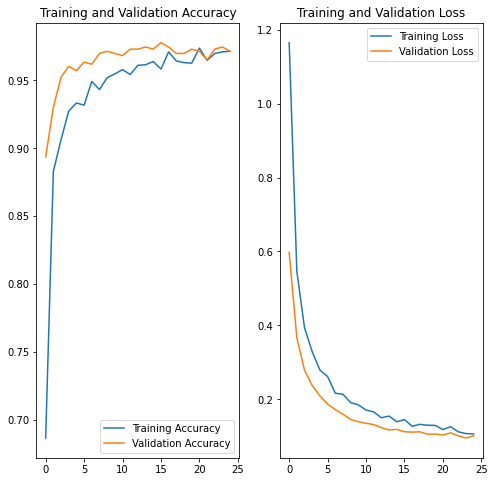

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

### Saving  the model
We can save the entire model for use in future applications.

In [15]:
save_model_path = '{}/models/EfficientNet_b7_258_258_RFC/model'.format(MAIN_PATH)
model.save(save_model_path)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab_Notebooks/Child_Seat_Localization/classifier/models/EfficientNet_b7_258_258_RFC/model/assets


# Testing the model performance

## Load the model
It is possible to load differents models to evalueta the performance. Pay atention on the IMAGE_HIGHT and IMAGE_WIDTH to match the model input size. 

In [16]:
load_model_path = '{}/models/EfficientNet_b7_258_258_RFC/model'.format(MAIN_PATH)

model = tf.keras.models.load_model(load_model_path)

### Evaluate the model performance and plot the confusuin matrix  

The model is evaluated on the single seat grayscale test images from each unknown vehicle (aclass, escape, gsf, i3, tiguan, tucson and x5) and plot the confusion matrix.

Found 1500 files belonging to 7 classes.
Test set accuracy for aclass: 0.544

<built-in method values of dict object at 0x7f4414d10870>


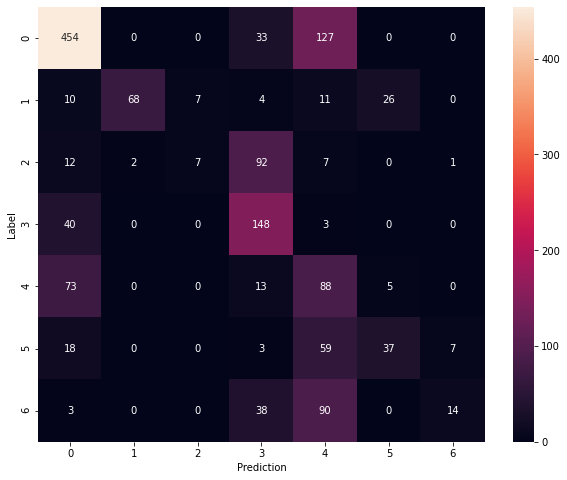

Found 1500 files belonging to 7 classes.
Test set accuracy for escape: 0.43133333333333335

<built-in method values of dict object at 0x7f4414d10870>


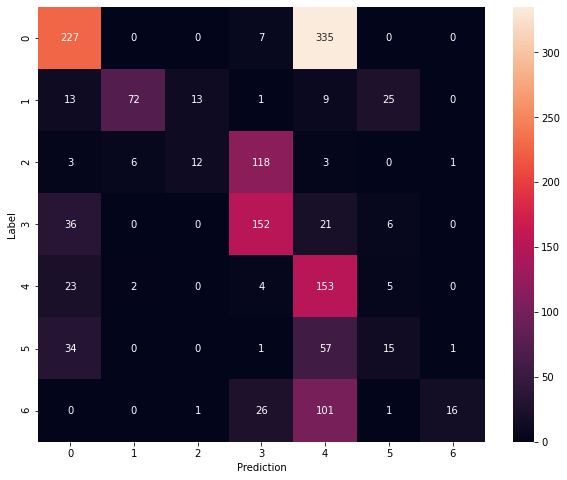

Found 1500 files belonging to 7 classes.
Test set accuracy for gsf: 0.43066666666666664

<built-in method values of dict object at 0x7f4414d10870>


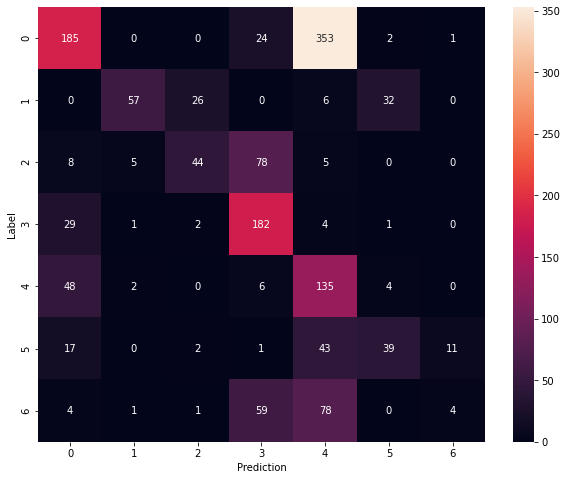

Found 1010 files belonging to 7 classes.
Test set accuracy for i3: 0.5158415841584159

<built-in method values of dict object at 0x7f4414d10870>


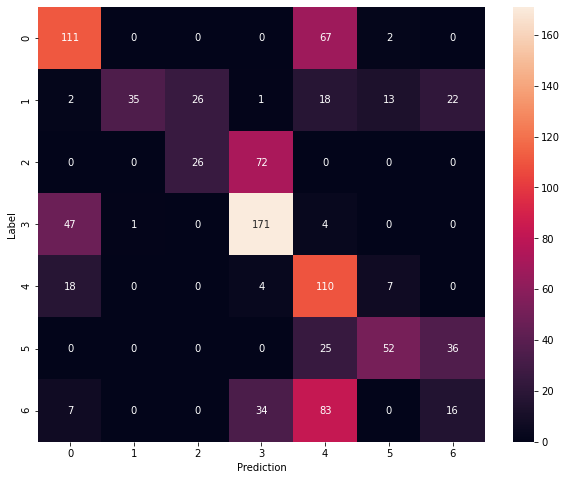

Found 1500 files belonging to 7 classes.
Test set accuracy for tiguan: 0.5346666666666666

<built-in method values of dict object at 0x7f4414d10870>


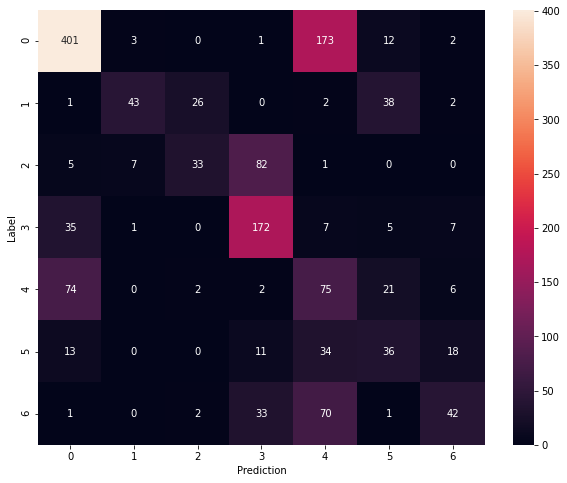

Found 1500 files belonging to 7 classes.
Test set accuracy for tucson: 0.5953333333333334

<built-in method values of dict object at 0x7f4414d10870>


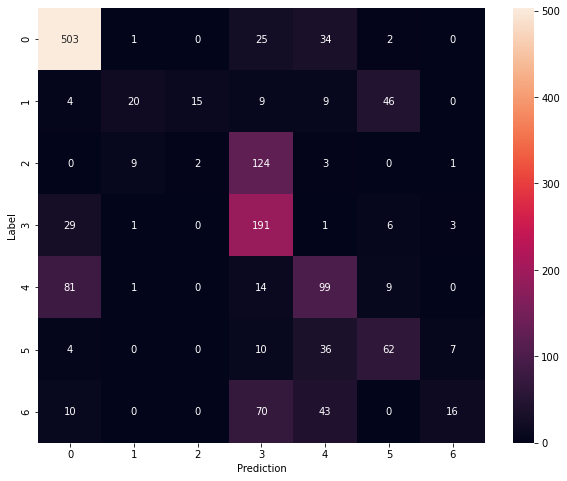

Found 1500 files belonging to 7 classes.
Test set accuracy for x5: 0.6133333333333333

<built-in method values of dict object at 0x7f4414d10870>


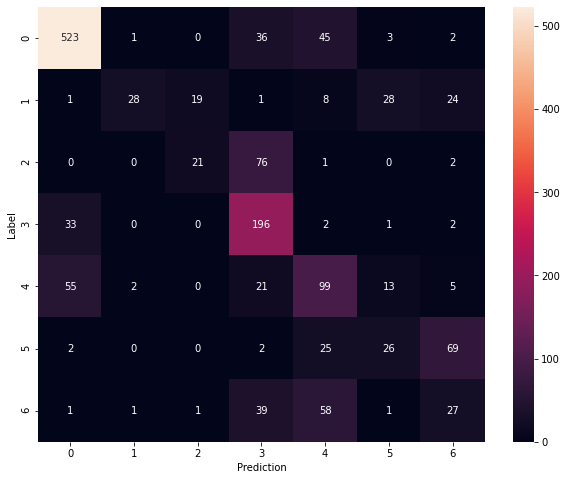

{'aclass': 0.544, 'escape': 0.43133333333333335, 'gsf': 0.43066666666666664, 'i3': 0.5158415841584159, 'tiguan': 0.5346666666666666, 'tucson': 0.5953333333333334, 'x5': 0.6133333333333333}
mean accuracy: 0.5235964167845356


In [17]:
# path to the riginal SVIRO datase containing the grayscale single seat images 
# of each vehicle
original_dataset_path = '{}/datasets/test/grayscale_single_seat'.format(MAIN_PATH)

vehicles_to_test = ['aclass','escape', 'gsf', 'i3','tiguan', 'tucson','x5']

cars_accuracy = {}
for vehicle in vehicles_to_test:

    test_dataset_path = original_dataset_path + \
                        "/{}/test_with_labels/grayscale".format(vehicle)

    test_dataset = image_dataset_from_directory(test_dataset_path,
                                                validation_split=None,
                                                subset=None,
                                                image_size=(IMAGE_HIGHT, IMAGE_WIDTH),
                                                color_mode="rgb",
                                                batch_size=1)

    # get the true values and the predicted values in all the images from the test dataset
    y_pred = []
    y_true = []
    for image, label in test_dataset:
        y_pred.append(int(np.argmax(model.predict(image), axis=1)))
        y_true.append(int(label))

    sum = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_true[i]:
            sum +=1

    test_accuracy = sum / len(y_true)

    cars_accuracy.update({vehicle: test_accuracy})

    print('Test set accuracy for {}: {}\n'.format(vehicle, test_accuracy))
    print(CLASSES.values)

    # plot the confusion matrix
    confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mtx, xticklabels=CLASSES, yticklabels=CLASSES, 
                annot=True, fmt='g')
    plt.xlabel('Prediction')
    plt.ylabel('Label')
    plt.show()

mean_accuracy = np.mean(list(cars_accuracy.values()))
print(cars_accuracy)
print("mean accuracy: {}".format(mean_accuracy))

# Testing on back seat images

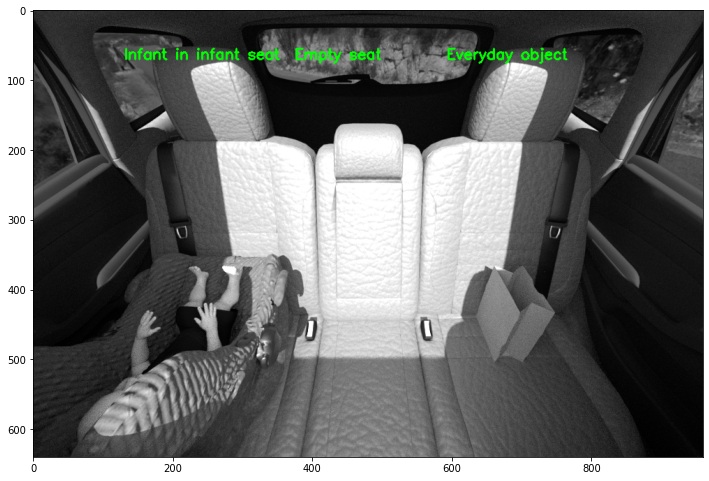

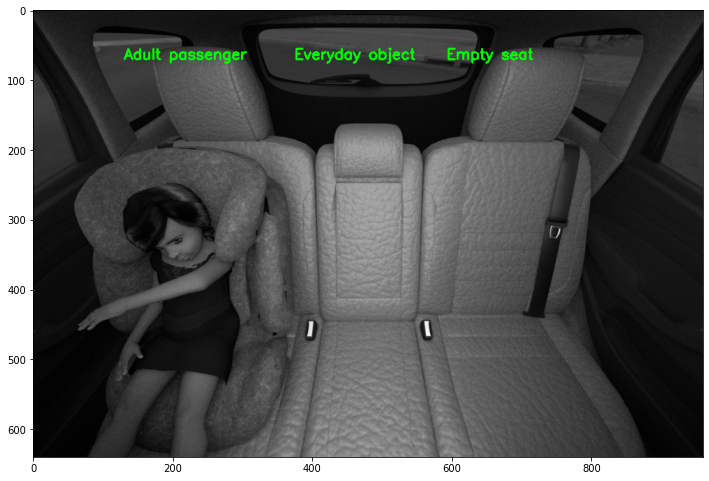

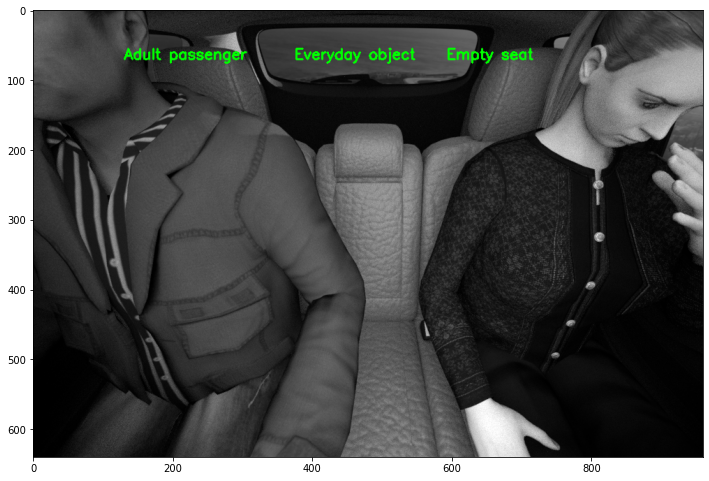

In [25]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

SEAT_HIGHT = 550
SEAT_WIDTH = 250
SEAT_SIZE = (SEAT_HIGHT, SEAT_WIDTH)

Y_START = [70, 70, 70]
X_START = [130, 364, 582]


def crop_seats_from_image (image, y_start, x_start, seat_size):
    croped_seats = []
    seat_hight = seat_size[0]
    seat_width = seat_size[1]
    for x, y in zip(x_start, y_start):
        croped_seats.append(image[y:y+seat_hight, x:x+seat_width])

    return croped_seats


def anotate_classes_on_image (image, class_texts, anotate_points):
    for text, point in zip(class_texts, anotate_points):
        print("")
        cv2.putText(image,text,point, cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255.0),2)
    
    return image


def classify_seats (seat_images, model):
    class_texts = []
    class_labels = []

    for seat_image in seat_images:

        seat_image_reshaped = cv2.resize(seat_image,(IMAGE_WIDTH,IMAGE_HIGHT), cv2.INTER_LINEAR)
        seat_image_reshaped = tf.expand_dims(seat_image_reshaped, 0)

        prediction = model.predict(seat_image_reshaped)
        class_label = int(np.argmax(prediction, axis=1))

        class_labels.append(class_label)
        class_texts.append(CLASSES[class_label])

    return class_labels, class_texts


# load images from vehicle

SAMPLES = 3
VEHICLE = "escape"
test_images_path = "{}/datasets/test/grayscale/{}/test_with_labels/grayscale_wholeImage".format(MAIN_PATH, VEHICLE)

# load images
image_files = [f for f in listdir(test_images_path) if
                    path.isfile(path.join(test_images_path, f)) and f.endswith(".png")]

image_file_samples = random.sample(image_files, SAMPLES)

# Do the inference and show the seat classification
for image_file in image_file_samples:
    image = cv2.imread(test_images_path + '/' + image_file)


    croped_seat_images = crop_seats_from_image(image, Y_START, X_START, SEAT_SIZE)

    seat_labels, seat_class_texts  = classify_seats(croped_seat_images, model)

    anotation_points = [(X_START[0],Y_START[0]),
                        (X_START[1]+10,Y_START[1]),
                        (X_START[2]+10,Y_START[2])]

    anotetated_image = anotate_classes_on_image(image,seat_class_texts,anotation_points)

    plt.figure(figsize=(12,12))
    plt.imshow(anotetated_image)